In [21]:
train_dir = '/Users/AMAB/Desktop/Bashar/MEC/Artificial Intelligence & Deep Learning/Dataset/train'
test_dir = '/Users/AMAB/Desktop/Bashar/MEC/Artificial Intelligence & Deep Learning/Dataset/test'

In [22]:
import os
print(len(os.listdir('/Users/AMAB/Desktop/Bashar/MEC/Artificial Intelligence & Deep Learning/Dataset/train/Bears')))
print(len(os.listdir('/Users/AMAB/Desktop/Bashar/MEC/Artificial Intelligence & Deep Learning/Dataset/train/Pandas')))
print(len(os.listdir('/Users/AMAB/Desktop/Bashar/MEC/Artificial Intelligence & Deep Learning/Dataset/test/Bears')))
print(len(os.listdir('/Users/AMAB/Desktop/Bashar/MEC/Artificial Intelligence & Deep Learning/Dataset/test/Pandas')))

250
250
50
50


In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [24]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

In [25]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [26]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
13/13 [==============================] - 27s 2s/step - loss: 3.4873 - accuracy: 0.5475 - val_loss: 0.1522 - val_accuracy: 0.9100
Epoch 2/3
13/13 [==============================] - 23s 2s/step - loss: 0.6280 - accuracy: 0.8000 - val_loss: 0.1547 - val_accuracy: 0.9100
Epoch 3/3
13/13 [==============================] - 23s 2s/step - loss: 0.2383 - accuracy: 0.9125 - val_loss: 0.2050 - val_accuracy: 0.9000


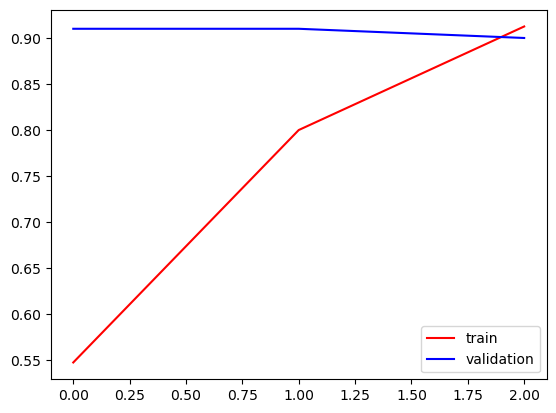

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

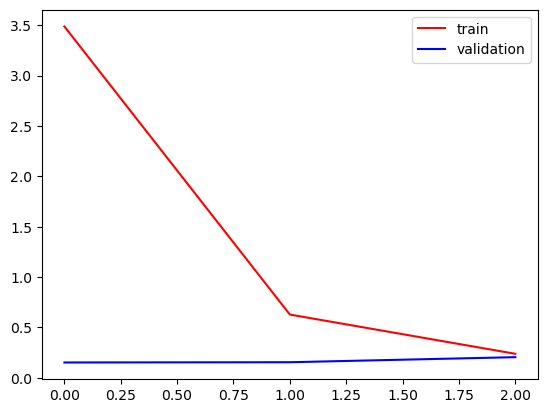

In [29]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [30]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 100 images belonging to 2 classes.


In [31]:
predictions = resnet_model.predict(test_data)
print(predictions)

4/4 [==============================] - 6s 1s/step
[[0.05960742]
 [0.9999645 ]
 [0.39517736]
 [0.9998474 ]
 [0.07376449]
 [0.9999996 ]
 [0.9999936 ]
 [0.99810183]
 [0.7550472 ]
 [0.9999996 ]
 [0.34906274]
 [0.9999996 ]
 [0.99999994]
 [0.04302008]
 [0.18661168]
 [0.9999986 ]
 [0.9999565 ]
 [1.        ]
 [0.13089429]
 [0.44287065]
 [0.09153447]
 [0.9999998 ]
 [0.9999758 ]
 [0.99999875]
 [0.00727024]
 [0.9999986 ]
 [0.13660185]
 [0.9993618 ]
 [1.        ]
 [0.02018761]
 [0.7220963 ]
 [0.9999999 ]
 [0.9999992 ]
 [0.9999997 ]
 [0.01451878]
 [0.01830281]
 [0.25469533]
 [0.9999983 ]
 [1.        ]
 [0.06169303]
 [0.99940264]
 [0.3340281 ]
 [0.7580202 ]
 [0.08387258]
 [0.9999812 ]
 [0.99999684]
 [0.48911616]
 [0.03715892]
 [1.        ]
 [0.08116749]
 [0.9999856 ]
 [0.9999696 ]
 [0.14161995]
 [0.02103859]
 [0.0070979 ]
 [0.07247123]
 [0.20760034]
 [0.89141864]
 [0.99967486]
 [0.01387101]
 [0.9717106 ]
 [1.        ]
 [0.9999999 ]
 [0.99930644]
 [0.05412296]
 [0.06386434]
 [0.99999624]
 [0.12267082

In [32]:
len(predictions)

100

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[21 29]
 [22 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.42      0.45        50
           1       0.49      0.56      0.52        50

    accuracy                           0.49       100
   macro avg       0.49      0.49      0.49       100
weighted avg       0.49      0.49      0.49       100

